In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
#impoerting the dataset
df = pd.read_csv("./dataset/Dataset_with_Random_Missing_Values.csv")

In [19]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,latitude,longitude,target,Category_A,Product_Type,Customer_Segment,Shipping_Method
0,54.967142,3.875100,117.150982,35.0,438.0,-72.305061,-6.369589,44.406192,Medium,Toys,Corporate,Overnight
1,48.617357,1.087208,134.680222,62.0,279.0,34.670996,83.662440,5.405507,High,Electronics,Wholesale,Express
2,56.476885,0.745162,197.010176,17.0,186.0,73.354975,65.352727,1.969791,High,Books,Retail,Overnight
3,NaN,NaN,NaN,NaN,NaN,86.473272,-164.054140,3.525541,NaN,NaN,NaN,NaN
4,47.658466,8.743558,128.259083,34.0,421.0,56.437541,-1.207086,230.842054,Low,Clothing,Individual,Standard


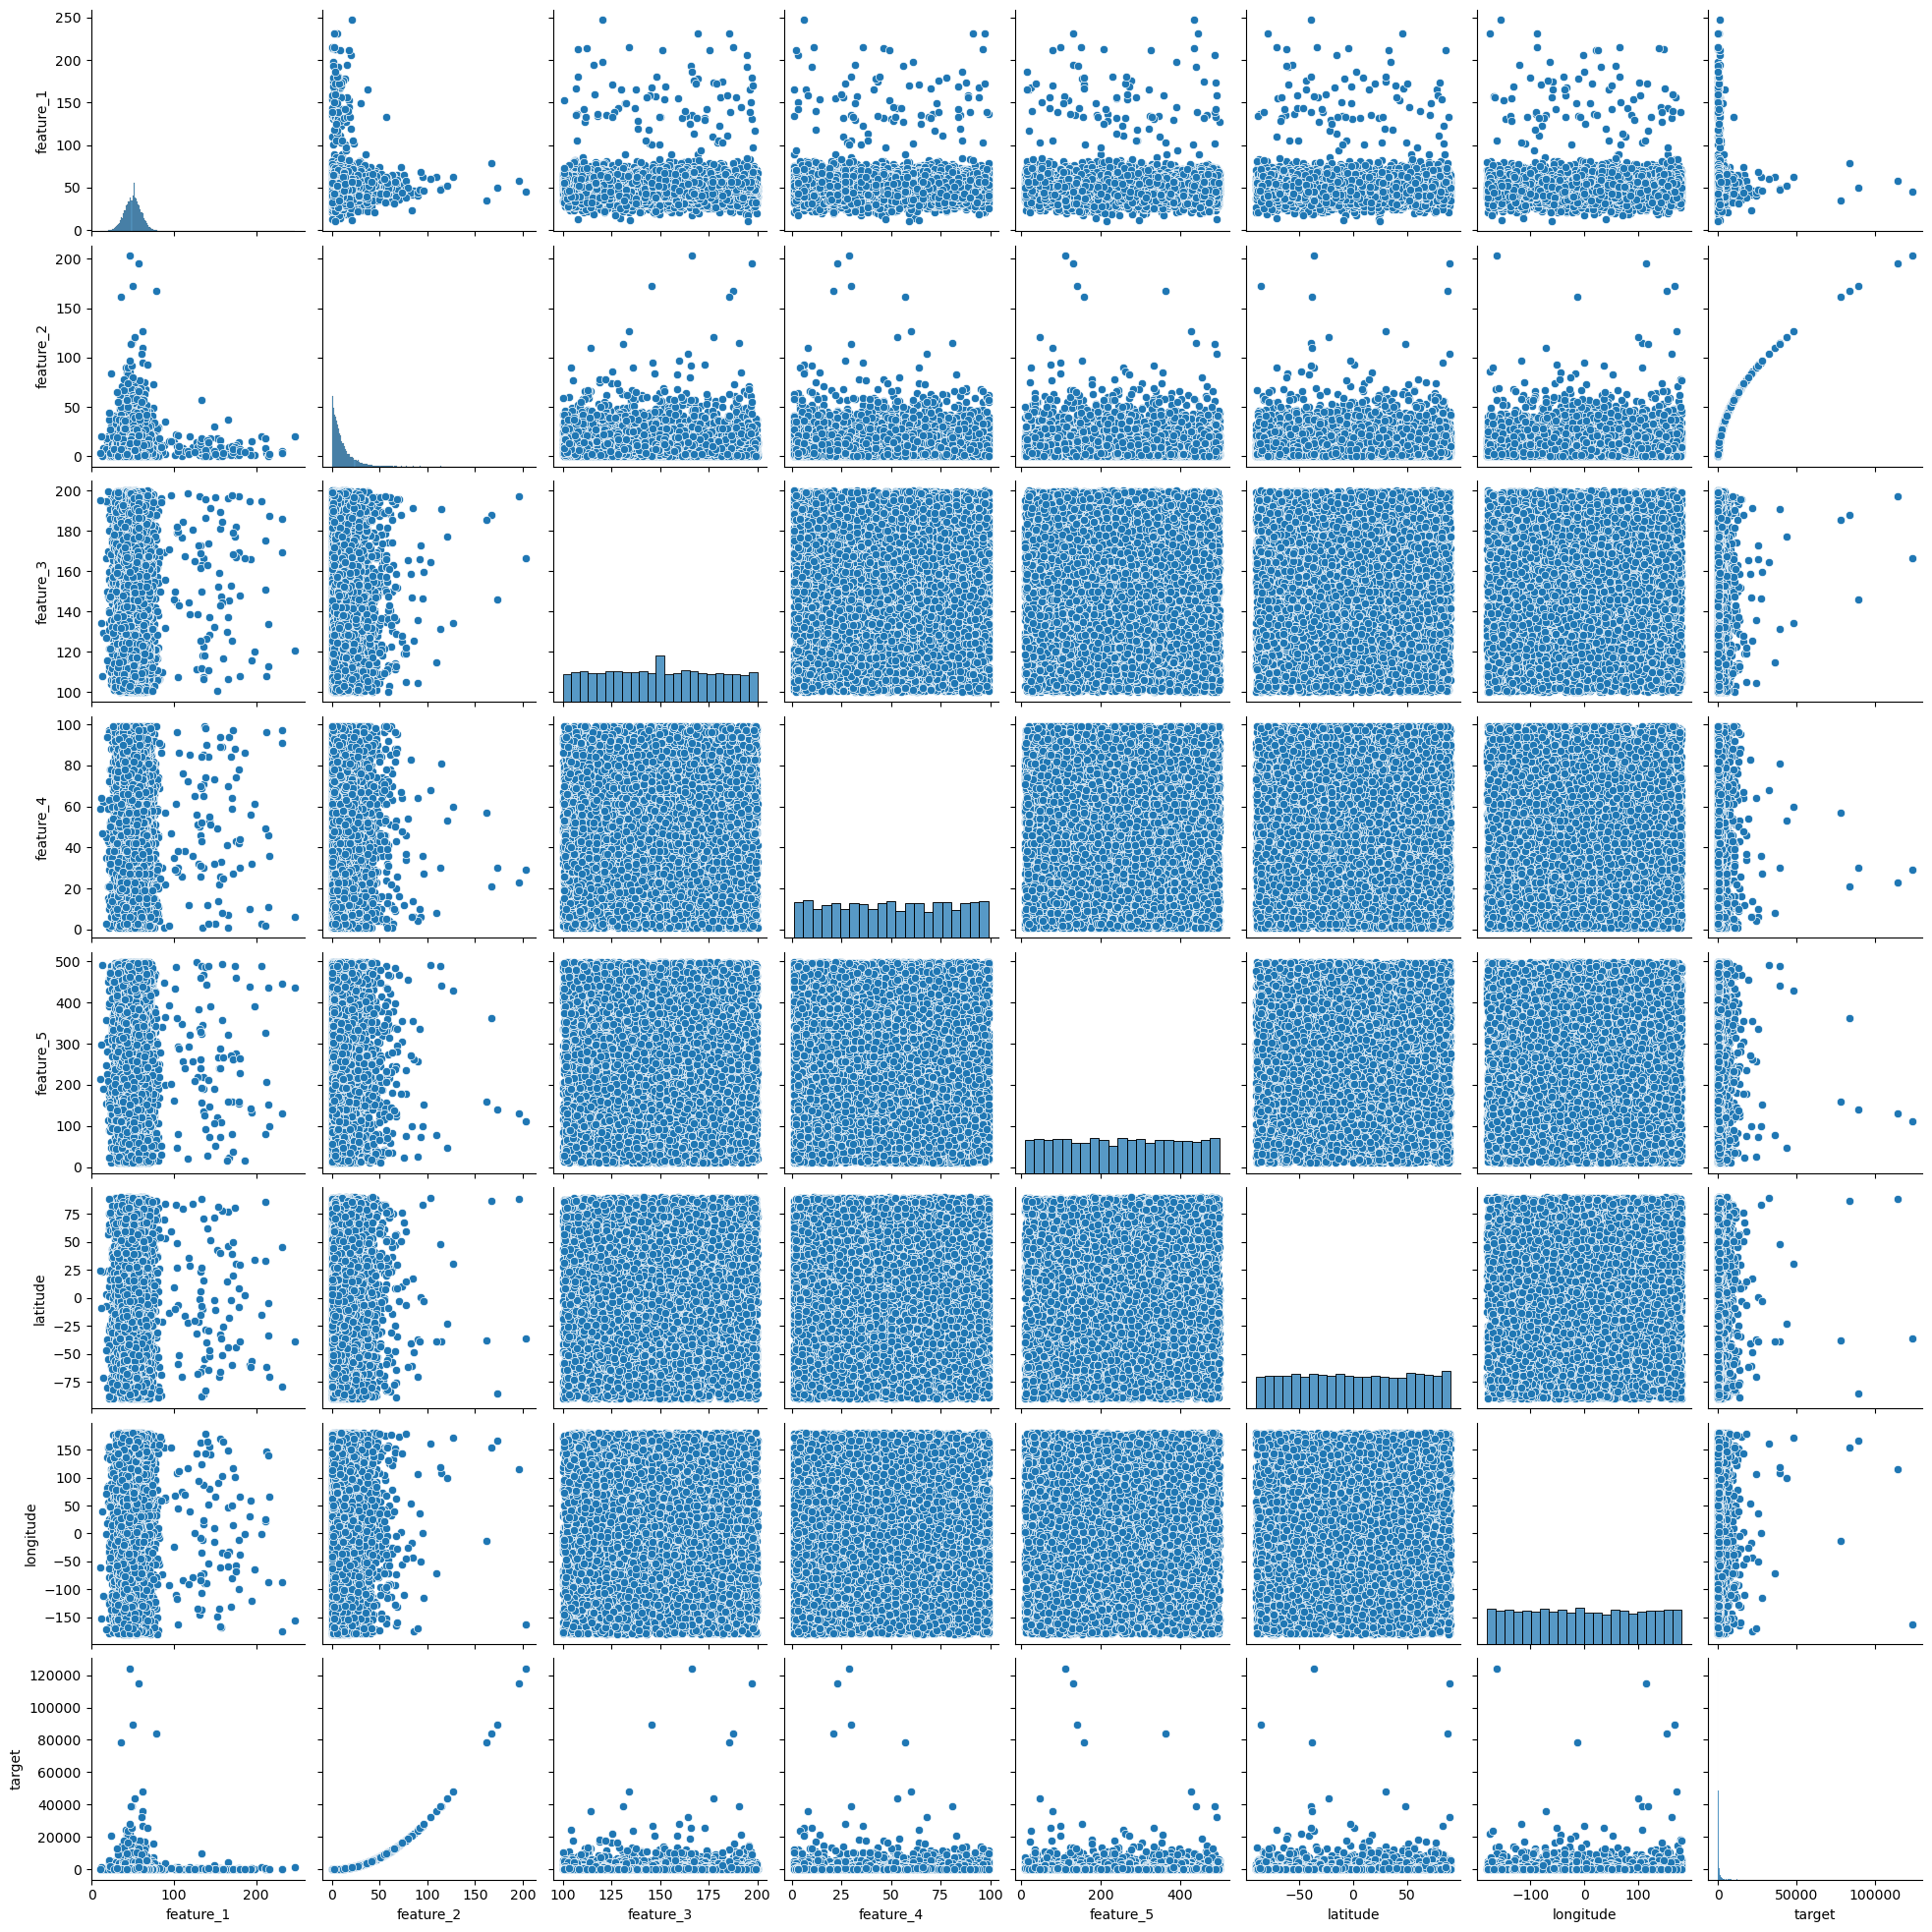

In [20]:
sns.pairplot(df)

In [21]:
df.shape

# there are 10000 rows and 12 columns

(10000, 12)

In [22]:
df.info()

# We can see that except for target variable and location data, our dataset has null values.
# we normally drop these rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   feature_1         9500 non-null   float64
 1   feature_2         9500 non-null   float64
 2   feature_3         9461 non-null   float64
 3   feature_4         9459 non-null   float64
 4   feature_5         9439 non-null   float64
 5   latitude          10000 non-null  float64
 6   longitude         10000 non-null  float64
 7   target            10000 non-null  float64
 8   Category_A        9500 non-null   object 
 9   Product_Type      9500 non-null   object 
 10  Customer_Segment  9500 non-null   object 
 11  Shipping_Method   9500 non-null   object 
dtypes: float64(8), object(4)
memory usage: 937.6+ KB


In [23]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,latitude,longitude,target
count,9500.000000,9500.000000,9461.000000,9459.000000,9439.000000,10000.000000,10000.000000,10000.000000
mean,50.966436,10.657211,149.583988,49.961412,254.384892,0.574621,-0.678968,748.622861
std,14.384354,11.730574,28.350926,28.773521,142.128017,52.260581,104.777481,2907.846259
min,10.775997,0.000481,100.006750,1.000000,10.000000,-89.991443,-179.947462,-15.638797
25%,43.584681,3.032912,125.376261,25.000000,129.000000,-44.714618,-91.043808,27.340834
50%,50.354148,7.231362,149.698618,50.000000,257.000000,-0.139104,-2.590233,156.272237
75%,56.724354,14.383355,173.291430,75.000000,377.000000,46.846011,91.124231,617.740235
max,247.292789,203.449144,199.973208,99.000000,499.000000,89.981107,179.961450,124160.191641


## Preprocessing

In [24]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [25]:
df.columns

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'latitude', 'longitude', 'target', 'Category_A', 'Product_Type',
       'Customer_Segment', 'Shipping_Method'],
      dtype='object')

In [26]:
Xdf = df[['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'latitude', 'longitude', 'Category_A', 'Product_Type',
       'Customer_Segment', 'Shipping_Method']]

In [27]:
y = df['target'].to_numpy()

In [28]:
# setting up a pipeline to first impute the colums wiht missing value and then stacling them.
numerical_col_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("Scaler", StandardScaler())
])

In [31]:
# categorical pipeline, first imputes the nans and them oneHotEncodes them
categorical_col_pipeline= make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder())

In [33]:

preprocessing = ColumnTransformer([
    ("numerical-processed", numerical_col_pipeline, Xdf.select_dtypes(include=np.number).columns),
    ("categorical-processed", categorical_col_pipeline, Xdf.select_dtypes(include=np.object_).columns)
])

In [34]:
preprocessing

ColumnTransformer(transformers=[('numerical-processed',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('Scaler', StandardScaler())]),
                                 Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'latitude', 'longitude'],
      dtype='object')),
                                ('categorical-processed',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 Index(['Category_A', 'Product_Type', 'Customer_Segment', 'Shipping_Method'], dtype='object'))])

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
linear_model = make_pipeline(
    preprocessing,
    LinearRegression()
)

In [37]:
linear_model.fit(Xdf,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical-processed',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'latitude', 'longitude'],
      dtype='object')),
                                                 ('categorical-processed',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  Index(['Category_A', 'Product_Type', 'Customer_Segment', 'Shipping_Method'], dtype='object'))])),
                ('linearregression', LinearRegression())])

In [38]:
y_pred = linear_model.predict(Xdf)

In [39]:
y_pred

array([ -672., -1048.,  -944., ...,  -744.,  1392.,  2848.])